In [1]:
import os, sys, logging, time, gc, pprint
import click
import numpy as np
from dmosopt.dmosopt import init_from_h5
from dmosopt.MOASMO import train
from joblib import dump, load
import matplotlib.pyplot as plt

dmosopt.discrepancy: Warning: unable to import numba
dmosopt.GLP: Warning: unable to import numba


In [2]:
file_path = '/home/igr/src/model/XPPcode/results/MC_20220117/dmosopt_DG_MC.h5'
opt_id = 'dmosopt_DG_MC_neuron'

In [3]:
_, old_evals, param_names, is_int, lo_bounds, hi_bounds, objective_names, feature_names, \
constraint_names, problem_parameters, problem_ids = \
                  init_from_h5(file_path, None, opt_id, None)


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(opt_id)

problem_id = 0

old_eval_xs = [e.parameters for e in old_evals[problem_id]]
old_eval_ys = [e.objectives for e in old_evals[problem_id]]
x = np.vstack(old_eval_xs)
y = np.vstack(old_eval_ys)
od_eval_fs = None
f = None
if feature_names is not None:
    old_eval_fs = [e.features for e in old_evals[problem_id]]
    f = np.concatenate(old_eval_fs, axis=None)
        
old_eval_cs = None
c = None
if constraint_names is not None:
    old_eval_cs = [e.constraints for e in old_evals[problem_id]]
    c = np.vstack(old_eval_cs)
        
x = np.vstack(old_eval_xs)
y = np.vstack(old_eval_ys)


n_dim = len(lo_bounds)
n_objectives = len(objective_names)
        
 

In [4]:
feasible = np.argwhere(np.all(c > 0., axis=1)).ravel()
y_feasible = y[feasible]
x_feasible = x[feasible]
y_feasible

array([[3.63921204e+02, 1.11581451e+02, 2.72732861e+03, 0.00000000e+00,
        2.71145463e-01],
       [4.06700928e+03, 1.05103836e+02, 3.73967847e+03, 0.00000000e+00,
        2.68360555e-01],
       [0.00000000e+00, 1.07110573e+02, 1.10413855e+03, 0.00000000e+00,
        2.56254584e-01],
       ...,
       [5.84632874e+02, 9.25538540e+00, 4.10493530e+02, 0.00000000e+00,
        2.63833731e-01],
       [2.37995605e+03, 1.00728523e+02, 3.56680012e+00, 0.00000000e+00,
        1.61814690e-01],
       [2.51062646e+03, 0.00000000e+00, 2.88585243e+01, 0.00000000e+00,
        2.52917290e-01]], dtype=float32)

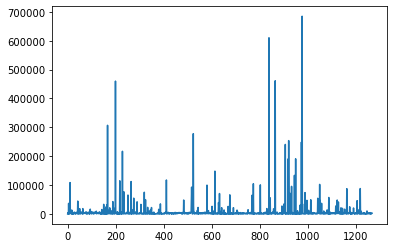

In [5]:
plt.plot(y_feasible[:,0])

In [6]:
sm = train(n_dim, n_objectives, np.asarray(lo_bounds), np.asarray(hi_bounds), \
            x, y, C=c, surrogate_method='vgp', logger=logger)


INFO:dmosopt_DG_MC_neuron:Found 1268 feasible solutions
INFO:dmosopt_DG_MC_neuron:VGP_Matern: creating regressor for output 1 of 5...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: y_0 range is (0.0, 685056.44)...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: optimizing regressor for output 1 of 5...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 0 likelihood: -59998.1058
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 100 likelihood: -57610.6586
INFO:dmosopt_DG_MC_neuron:VGP_Matern: likelihood change at iteration 101 is less than 0.1 percent
INFO:dmosopt_DG_MC_neuron:VGP_Matern: creating regressor for output 2 of 5...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: y_1 range is (0.0, 51033.22)...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: optimizing regressor for output 2 of 5...


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════════════╤═════════╤══════════════════════════════════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape           │ dtype   │ value                                                │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════════════╪═════════╪══════════════════════════════════════════════════════╡
│ VGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()              │ float64 │ 1.8296906713492178                                   │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────────────────────────────────────────┤
│ VGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (12,)           │ float64 │ [0.36179051, 0.40704001, 0.38510157...               │
├───

INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 0 likelihood: -58736.6630
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 100 likelihood: -52446.1272
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 200 likelihood: -21919.8594
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 300 likelihood: -2353.3244
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 400 likelihood: -2018.8922
INFO:dmosopt_DG_MC_neuron:VGP_Matern: likelihood change at iteration 415 is less than 0.1 percent
INFO:dmosopt_DG_MC_neuron:VGP_Matern: creating regressor for output 3 of 5...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: y_2 range is (0.125, 42355.57)...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: optimizing regressor for output 3 of 5...


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════════════╤═════════╤══════════════════════════════════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape           │ dtype   │ value                                                │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════════════╪═════════╪══════════════════════════════════════════════════════╡
│ VGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()              │ float64 │ 5.448257081319139                                    │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────────────────────────────────────────┤
│ VGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (12,)           │ float64 │ [0.00048161, 0.00298232, 0.00325757...               │
├───

INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 0 likelihood: -53836.6220
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 100 likelihood: -19047.4773
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 200 likelihood: -1243.8347
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 300 likelihood: -1033.6070
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 400 likelihood: -913.3548
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 500 likelihood: -801.3915
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 600 likelihood: -687.3849
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 700 likelihood: -558.9950
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 800 likelihood: -456.0399
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 900 likelihood: -390.8255
INFO:dmosopt_DG_MC_neuron:VGP_Matern: likelihood change at iteration 989 is less than 0.1 percent
INFO:dmosopt_DG_MC_neuron:VGP_Matern: creating regressor for output 4 of 5...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: y_3 range is (0.0, 1787.4763)...
INFO:dmos

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════════════╤═════════╤══════════════════════════════════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape           │ dtype   │ value                                                │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════════════╪═════════╪══════════════════════════════════════════════════════╡
│ VGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()              │ float64 │ 4.468388250109801                                    │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────────────────────────────────────────┤
│ VGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (12,)           │ float64 │ [2.94165262e-04, 6.21006839e-02, 7.49788926e-03...   │
├───

INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 0 likelihood: -60322.6653
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 100 likelihood: -3371.1932
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 200 likelihood: -1364.1550
INFO:dmosopt_DG_MC_neuron:VGP_Matern: likelihood change at iteration 295 is less than 0.1 percent
INFO:dmosopt_DG_MC_neuron:VGP_Matern: creating regressor for output 5 of 5...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: y_4 range is (0.07845443, 45.808456)...
INFO:dmosopt_DG_MC_neuron:VGP_Matern: optimizing regressor for output 5 of 5...


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════════════╤═════════╤══════════════════════════════════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape           │ dtype   │ value                                                │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════════════╪═════════╪══════════════════════════════════════════════════════╡
│ VGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()              │ float64 │ 6.24808708552006                                     │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────────────────────────────────────────┤
│ VGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (12,)           │ float64 │ [0.00226743, 0.0060217, 0.01338068...                │
├───

INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 0 likelihood: -67189.6859
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 100 likelihood: 209.5767
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 200 likelihood: 363.8663
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 300 likelihood: 437.1303
INFO:dmosopt_DG_MC_neuron:VGP_Matern: iteration 400 likelihood: 493.3494
INFO:dmosopt_DG_MC_neuron:VGP_Matern: likelihood change at iteration 459 is less than 0.1 percent


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════════════╤═════════╤══════════════════════════════════════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape           │ dtype   │ value                                                │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════════════╪═════════╪══════════════════════════════════════════════════════╡
│ VGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()              │ float64 │ 5.0808406795483005                                   │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────────────┼─────────┼──────────────────────────────────────────────────────┤
│ VGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (12,)           │ float64 │ [0.01994613, 0.02960713, 0.01713002...               │
├───

In [7]:

ts = time.strftime("%Y%m%d_%H%M%S")
output_file_path = f'./{opt_id}_{ts}.joblib'
            
dump(sm, output_file_path)

['./dmosopt_DG_MC_neuron_20220211_123703.joblib']

In [4]:
sm = load('./dmosopt_DG_MC_neuron_20220211_123703.joblib')

In [5]:
objective_names, param_names, lo_bounds, hi_bounds

(['rn_error',
  'tau_error',
  'fI_error',
  'spike_amplitude_error',
  'ISI_adaptation_error'],
 ['pp',
  'Ltotal',
  'gc',
  'soma_gmax_Na',
  'soma_gmax_K',
  'soma_g_pas',
  'dend_gmax_Ca',
  'dend_gmax_KCa',
  'dend_gmax_KAHP',
  'dend_g_pas',
  'dend_d_Caconc',
  'cm_ratio'],
 [0.05, 25.0, 0.1, 0.001, 1e-04, 1e-05, 1e-04, 1e-04, 1e-04, 1e-06, 2.0, 1.0],
 [0.5, 250.0, 100.0, 0.5, 0.5, 0.001, 0.5, 0.5, 0.1, 0.001, 24.0, 20.0])

In [6]:
from SALib.sample import saltelli, fast_sampler
from SALib.analyze import sobol

bounds = list(zip(lo_bounds, hi_bounds))

problem = {
  'num_vars': len(param_names),
  'names': param_names,
  'bounds': bounds
}

logger.info(f'problem: {problem}')

# Generate samples
param_values = saltelli.sample(problem, 8192, calc_second_order=True)

# Run model (example)
Y = sm.evaluate(param_values)


INFO:dmosopt_DG_MC_neuron:problem: {'num_vars': 12, 'names': ['pp', 'Ltotal', 'gc', 'soma_gmax_Na', 'soma_gmax_K', 'soma_g_pas', 'dend_gmax_Ca', 'dend_gmax_KCa', 'dend_gmax_KAHP', 'dend_g_pas', 'dend_d_Caconc', 'cm_ratio'], 'bounds': [(0.05, 0.5), (25.0, 250.0), (0.1, 100.0), (0.001, 0.5), (1e-04, 0.5), (1e-05, 0.001), (1e-04, 0.5), (1e-04, 0.5), (1e-04, 0.1), (1e-06, 0.001), (2.0, 24.0), (1.0, 20.0)]}


In [7]:
param_values.shape

(212992, 12)

In [8]:

# Perform analysis
Sis = list([sobol.analyze(problem, Y[:,i], print_to_console=True) for i in range(Y.shape[1])])
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals)


                          ST       ST_conf
pp              1.899368e-04  8.591124e-06
Ltotal          5.735175e-01  2.440289e-02
gc              4.009902e-01  2.092187e-02
soma_gmax_Na    3.033241e-04  1.241099e-05
soma_gmax_K     3.354087e-04  1.432345e-05
soma_g_pas      1.400667e-14  7.215482e-16
dend_gmax_Ca    1.663973e-07  7.914950e-09
dend_gmax_KCa   2.178732e-04  9.977492e-06
dend_gmax_KAHP  3.618778e-07  1.512954e-08
dend_g_pas      9.699421e-17  3.597566e-17
dend_d_Caconc   1.664216e-01  8.879121e-03
cm_ratio        3.900298e-02  1.612619e-03
                          S1       S1_conf
pp              1.929206e-04  4.377539e-04
Ltotal          3.950505e-01  2.602088e-02
gc              2.949950e-01  2.299922e-02
soma_gmax_Na    2.917852e-04  4.987604e-04
soma_gmax_K     3.312885e-04  5.523827e-04
soma_g_pas      6.920938e-10  3.501048e-09
dend_gmax_Ca    3.638933e-08  1.216929e-05
dend_gmax_KCa   2.078269e-04  4.250791e-04
dend_gmax_KAHP  1.273057e-07  1.715346e-05
dend_g_pas 

In [9]:
S1s = np.array([s['S1'] for s in Sis])
S1s[0]


array([-0.0001322 ,  0.00243029, -0.00085131,  0.0096279 , -0.00757668,
        0.00620752,  0.00550908, -0.00401673,  0.00703183, -0.01647113,
       -0.00117147, -0.00902507])

In [10]:
STs = np.array([s['ST'] for s in Sis])
STs[2]

array([0.20623735, 0.22852352, 0.08983287, 0.10113502, 0.0817779 ,
       0.16823664, 0.24597097, 0.06685797, 0.13324248, 0.1585147 ,
       0.10465833, 0.2272546 ])

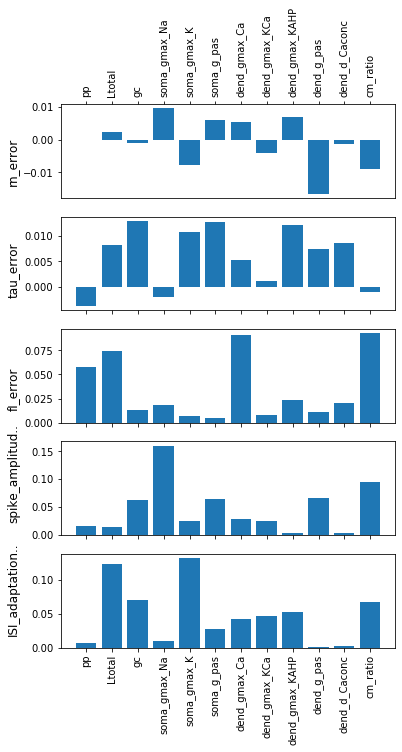

In [11]:

fig = plt.figure(figsize=(6, 10))
gs = fig.add_gridspec(len(objective_names), 1)

for i, objective_name in enumerate(objective_names):
    ax = fig.add_subplot(gs[i, 0])  
    ax.bar(np.arange(0, S1s[i].shape[0]), height=S1s[i])
    title = (objective_name[:14] + '..') if len(objective_name) > 14 else objective_name
    ax.set_title(title, rotation='vertical',x=-0.14,y=0.1)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start+1, end, 1))
    if i > 0 and i < len(objective_names)-1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(problem['names'])
    ax.xaxis.set_tick_params(rotation=90)
    if i == 0:
        ax.xaxis.tick_top()

plt.show()

In [16]:
from SALib.sample import fast_sampler
from SALib.analyze import fast

bounds = list(zip(lo_bounds, hi_bounds))

problem = {
  'num_vars': len(param_names),
  'names': param_names,
  'bounds': bounds
}

logger.info(f'problem: {problem}')

# Generate samples
param_values = fast_sampler.sample(problem, 10000)

# Run model (example)
Y = sm.evaluate(param_values)


INFO:dmosopt_DG_MC_neuron:problem: {'num_vars': 12, 'names': ['pp', 'Ltotal', 'gc', 'soma_gmax_Na', 'soma_gmax_K', 'soma_g_pas', 'dend_gmax_Ca', 'dend_gmax_KCa', 'dend_gmax_KAHP', 'dend_g_pas', 'dend_d_Caconc', 'cm_ratio'], 'bounds': [(0.05, 0.5), (25.0, 250.0), (0.1, 100.0), (0.001, 0.5), (1e-04, 0.5), (1e-05, 0.001), (1e-04, 0.5), (1e-04, 0.5), (1e-04, 0.1), (1e-06, 0.001), (2.0, 24.0), (1.0, 20.0)]}


In [17]:
# Perform analysis
Sis = list([fast.analyze(problem, Y[:,i], print_to_console=True) for i in range(Y.shape[1])])
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals)


                          S1        ST   S1_conf   ST_conf
pp              2.015382e-04  0.000706  0.000837  0.008586
Ltotal          3.250166e-01  0.588758  0.000868  0.008158
gc              2.690169e-01  0.367078  0.000820  0.007329
soma_gmax_Na    3.207760e-04  0.000997  0.000795  0.008412
soma_gmax_K     5.244136e-04  0.001496  0.000710  0.009830
soma_g_pas      1.663252e-10  0.000394  0.000761  0.008149
dend_gmax_Ca    1.904472e-07  0.000645  0.000820  0.006861
dend_gmax_KCa   1.172147e-04  0.000546  0.000872  0.009980
dend_gmax_KAHP  4.545047e-07  0.000664  0.000824  0.008044
dend_g_pas      2.850211e-10  0.000849  0.000838  0.007653
dend_d_Caconc   7.767675e-02  0.147247  0.000735  0.007789
cm_ratio        3.896129e-02  0.041498  0.000763  0.008969
                          S1        ST   S1_conf   ST_conf
pp              1.415416e-04  0.092298  0.000724  0.008207
Ltotal          1.932734e-02  0.621824  0.000782  0.008768
gc              1.590075e-01  0.874784  0.000743  0.0090

In [18]:
S1s = np.array([s['S1'] for s in Sis])
S1s[0]


array([2.01538181e-04, 3.25016631e-01, 2.69016926e-01, 3.20775975e-04,
       5.24413605e-04, 1.66325234e-10, 1.90447184e-07, 1.17214711e-04,
       4.54504737e-07, 2.85021063e-10, 7.76767490e-02, 3.89612864e-02])

In [19]:
STs = np.array([s['ST'] for s in Sis])
STs[2]

array([0.23584502, 0.57380987, 0.77176415, 0.01281129, 0.01294796,
       0.01070534, 0.01732732, 0.01031209, 0.19461435, 0.0102325 ,
       0.162442  , 0.58039701])

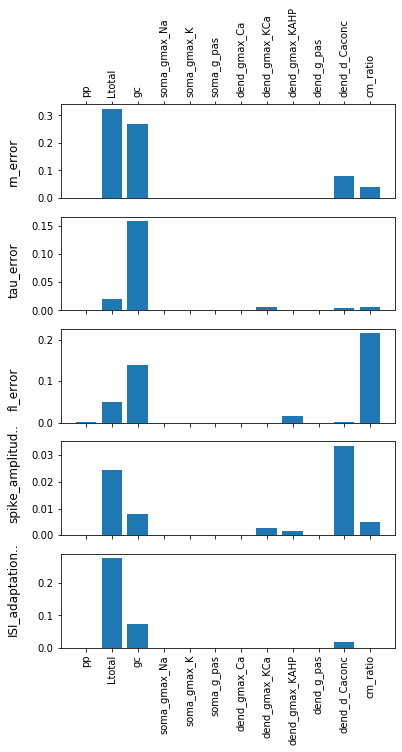

In [20]:
fig = plt.figure(figsize=(6, 10))
gs = fig.add_gridspec(len(objective_names), 1)

for i, objective_name in enumerate(objective_names):
    ax = fig.add_subplot(gs[i, 0])  
    ax.bar(np.arange(0, S1s[i].shape[0]), height=S1s[i])
    title = (objective_name[:14] + '..') if len(objective_name) > 14 else objective_name
    ax.set_title(title, rotation='vertical',x=-0.14,y=0.1)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start+1, end, 1))
    if i > 0 and i < len(objective_names)-1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(problem['names'])
    ax.xaxis.set_tick_params(rotation=90)
    if i == 0:
        ax.xaxis.tick_top()

plt.show()

In [13]:
from SALib.sample import latin
from SALib.analyze import rbd_fast

bounds = list(zip(lo_bounds, hi_bounds))

problem = {
  'num_vars': len(param_names),
  'names': param_names,
  'bounds': bounds
}

logger.info(f'problem: {problem}')

# Generate samples
param_values =  latin.sample(problem, 50000)

# Run model (example)
Y = sm.evaluate(param_values)


INFO:dmosopt_DG_MC_neuron:problem: {'num_vars': 12, 'names': ['pp', 'Ltotal', 'gc', 'soma_gmax_Na', 'soma_gmax_K', 'soma_g_pas', 'dend_gmax_Ca', 'dend_gmax_KCa', 'dend_gmax_KAHP', 'dend_g_pas', 'dend_d_Caconc', 'cm_ratio'], 'bounds': [(0.05, 0.5), (25.0, 250.0), (0.1, 100.0), (0.001, 0.5), (1e-04, 0.5), (1e-05, 0.001), (1e-04, 0.5), (1e-04, 0.5), (1e-04, 0.1), (1e-06, 0.001), (2.0, 24.0), (1.0, 20.0)]}


In [14]:
# Perform analysis
Sis = list([rbd_fast.analyze(problem, param_values, Y[:,i], print_to_console=True) for i in range(Y.shape[1])])
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals)


                      S1   S1_conf
pp             -0.000009  0.000494
Ltotal          0.385542  0.012137
gc              0.294960  0.007882
soma_gmax_Na    0.000287  0.000770
soma_gmax_K     0.000151  0.000509
soma_g_pas      0.000035  0.000512
dend_gmax_Ca   -0.000171  0.000534
dend_gmax_KCa  -0.000021  0.000555
dend_gmax_KAHP -0.000008  0.000573
dend_g_pas     -0.000096  0.000551
dend_d_Caconc   0.088061  0.006056
cm_ratio        0.038140  0.004419
                      S1   S1_conf
pp              0.000137  0.000583
Ltotal          0.013058  0.003677
gc              0.127956  0.034993
soma_gmax_Na    0.000013  0.000631
soma_gmax_K    -0.000094  0.000556
soma_g_pas     -0.000016  0.000571
dend_gmax_Ca   -0.000033  0.000478
dend_gmax_KCa   0.002170  0.001312
dend_gmax_KAHP  0.000060  0.000628
dend_g_pas      0.000125  0.000579
dend_d_Caconc   0.001618  0.001063
cm_ratio        0.002910  0.001229
                      S1   S1_conf
pp              0.003000  0.001461
Ltotal          0.03

In [15]:
S1s = np.array([s['S1'] for s in Sis])
S1s[0]


array([-8.51229821e-06,  3.85541525e-01,  2.94959846e-01,  2.87175166e-04,
        1.51475965e-04,  3.48617844e-05, -1.70548515e-04, -2.08535918e-05,
       -8.44431357e-06, -9.62877447e-05,  8.80608457e-02,  3.81398016e-02])

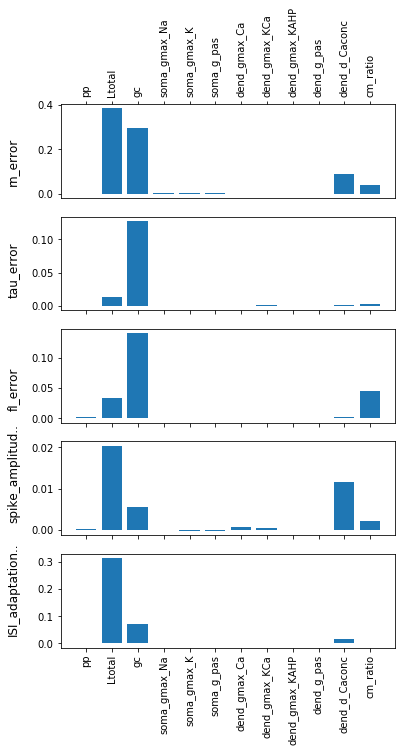

In [16]:
fig = plt.figure(figsize=(6, 10))
gs = fig.add_gridspec(len(objective_names), 1)

for i, objective_name in enumerate(objective_names):
    ax = fig.add_subplot(gs[i, 0])  
    ax.bar(np.arange(0, S1s[i].shape[0]), height=S1s[i])
    title = (objective_name[:14] + '..') if len(objective_name) > 14 else objective_name
    ax.set_title(title, rotation='vertical',x=-0.14,y=0.1)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start+1, end, 1))
    if i > 0 and i < len(objective_names)-1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(problem['names'])
    ax.xaxis.set_tick_params(rotation=90)
    if i == 0:
        ax.xaxis.tick_top()

plt.show()

In [6]:
from SALib.sample import finite_diff
from SALib.analyze import dgsm

bounds = list(zip(lo_bounds, hi_bounds))

problem = {
  'num_vars': len(param_names),
  'names': param_names,
  'bounds': bounds
}

logger.info(f'problem: {problem}')

# Generate samples
param_values =  finite_diff.sample(problem, 10000)

# Run model (example)
Y = sm.evaluate(param_values)


INFO:dmosopt_DG_MC_neuron:problem: {'num_vars': 12, 'names': ['pp', 'Ltotal', 'gc', 'soma_gmax_Na', 'soma_gmax_K', 'soma_g_pas', 'dend_gmax_Ca', 'dend_gmax_KCa', 'dend_gmax_KAHP', 'dend_g_pas', 'dend_d_Caconc', 'cm_ratio'], 'bounds': [(0.05, 0.5), (25.0, 250.0), (0.1, 100.0), (0.001, 0.5), (1e-04, 0.5), (1e-05, 0.001), (1e-04, 0.5), (1e-04, 0.5), (1e-04, 0.1), (1e-06, 0.001), (2.0, 24.0), (1.0, 20.0)]}


In [7]:
# Perform analysis
Sis = list([dgsm.analyze(problem, param_values, Y[:,i], print_to_console=True) for i in range(Y.shape[1])])
# Returns a dictionary with keys 'S1', 'S1_conf', 'ST', and 'ST_conf'
# (first and total-order indices with bootstrap confidence intervals)


                           vi         vi_std          dgsm    dgsm_conf
pp              311307.286294   22365.131570  2.307063e-04   430.163600
Ltotal           37879.560491   89753.409367  7.018029e+00  1904.920528
gc               33721.332475   64881.491319  1.231632e+00  1269.255402
soma_gmax_Na    404306.116501   30987.846093  3.684314e-04   634.612049
soma_gmax_K     445426.758429   35249.513858  4.073688e-04   691.371363
soma_g_pas         581.545059   20388.160187  2.085927e-12   408.477162
dend_gmax_Ca       226.942595     491.201153  2.075523e-07     9.992419
dend_gmax_KCa   289423.398670   25218.375923  2.646946e-04   485.016256
dend_gmax_KAHP   12078.609043    2507.638976  4.411569e-07    51.105362
dend_g_pas         173.910172    5616.857220  6.351864e-13   127.726239
dend_d_Caconc   114231.408556  150571.383602  2.023374e-01  2587.659875
cm_ratio         35889.719316   16952.752155  4.741573e-02   324.308357
                          vi        vi_std          dgsm     dgs

In [10]:
dgsms = np.array([s['dgsm'] for s in Sis])
dgsms[0]


array([2.30706328e-04, 7.01802941e+00, 1.23163191e+00, 3.68431405e-04,
       4.07368849e-04, 2.08592675e-12, 2.07552290e-07, 2.64694643e-04,
       4.41156940e-07, 6.35186432e-13, 2.02337374e-01, 4.74157343e-02])

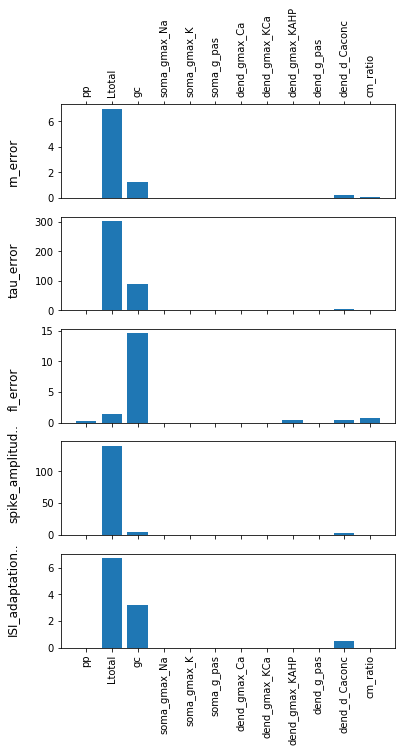

In [12]:
fig = plt.figure(figsize=(6, 10))
gs = fig.add_gridspec(len(objective_names), 1)

for i, objective_name in enumerate(objective_names):
    ax = fig.add_subplot(gs[i, 0])  
    ax.bar(np.arange(0, dgsms[i].shape[0]), height=dgsms[i])
    title = (objective_name[:14] + '..') if len(objective_name) > 14 else objective_name
    ax.set_title(title, rotation='vertical',x=-0.14,y=0.1)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start+1, end, 1))
    if i > 0 and i < len(objective_names)-1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(problem['names'])
    ax.xaxis.set_tick_params(rotation=90)
    if i == 0:
        ax.xaxis.tick_top()

plt.show()